# Importando bibliotecas necessárias

In [56]:
import pandas as pd 
import hvplot.pandas
import numpy as np 
import matplotlib.pyplot as plt 

# Leitura do dataset

In [57]:
df = pd.read_csv('result-megasena.CSV')
df.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2582,12/04/2023,34,10,21,19,14,17
1,2581,08/04/2023,17,14,39,60,32,36
2,2580,05/04/2023,43,36,3,29,13,4
3,2579,01/04/2023,10,26,44,5,35,38
4,2578,29/03/2023,47,59,60,37,50,39


# Verificando informações da tabela

In [58]:
df.dtypes

Concurso     int64
Data        object
bola 1       int64
bola 2       int64
bola 3       int64
bola 4       int64
bola 5       int64
bola 6       int64
dtype: object

In [59]:
df.shape

(2582, 8)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Concurso  2582 non-null   int64 
 1   Data      2582 non-null   object
 2   bola 1    2582 non-null   int64 
 3   bola 2    2582 non-null   int64 
 4   bola 3    2582 non-null   int64 
 5   bola 4    2582 non-null   int64 
 6   bola 5    2582 non-null   int64 
 7   bola 6    2582 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 161.5+ KB


In [61]:
# Removendo a coluna Data
df = df.drop(['Data'], axis=1)
df

,Concurso,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2582,34,10,21,19,14,17
1,2581,17,14,39,60,32,36
2,2580,43,36,3,29,13,4
3,2579,10,26,44,5,35,38
4,2578,47,59,60,37,50,39
...,...,...,...,...,...,...,...
2577,5,1,19,46,6,16,2
2578,4,6,59,42,27,1,5
2579,3,36,30,10,11,29,47
2580,2,9,39,37,49,43,41


# Analisando dados da tabela

In [62]:
# Verificando se alguma vez as dezenas se repetiram na mesma ordem
resultados = df.groupby(['bola 1','bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']).size().sort_values(ascending=False)
resultados

bola 1  bola 2  bola 3  bola 4  bola 5  bola 6
1       2       10      48      14      8         1
40      17      23      43      27      58        1
41      2       42      30      12      10        1
                53      5       13      27        1
        3       10      30      57      13        1
                                                 ..
21      18      56      15      51      12        1
        19      1       9       34      54        1
        23      20      7       29      15        1
                43      1       19      33        1
60      58      49      32      20      34        1
Length: 2582, dtype: int64

In [63]:
#Conferindo quantos resultados foram repetidos
repetidos = (resultados > 1).sum()
print(f'{repetidos} combinações se repetiram mais de uma vez.')

0 combinações se repetiram mais de uma vez.


In [64]:
# Frequencia de cada bola sorteada
frequencia = df.iloc[:, 2:].stack().value_counts()

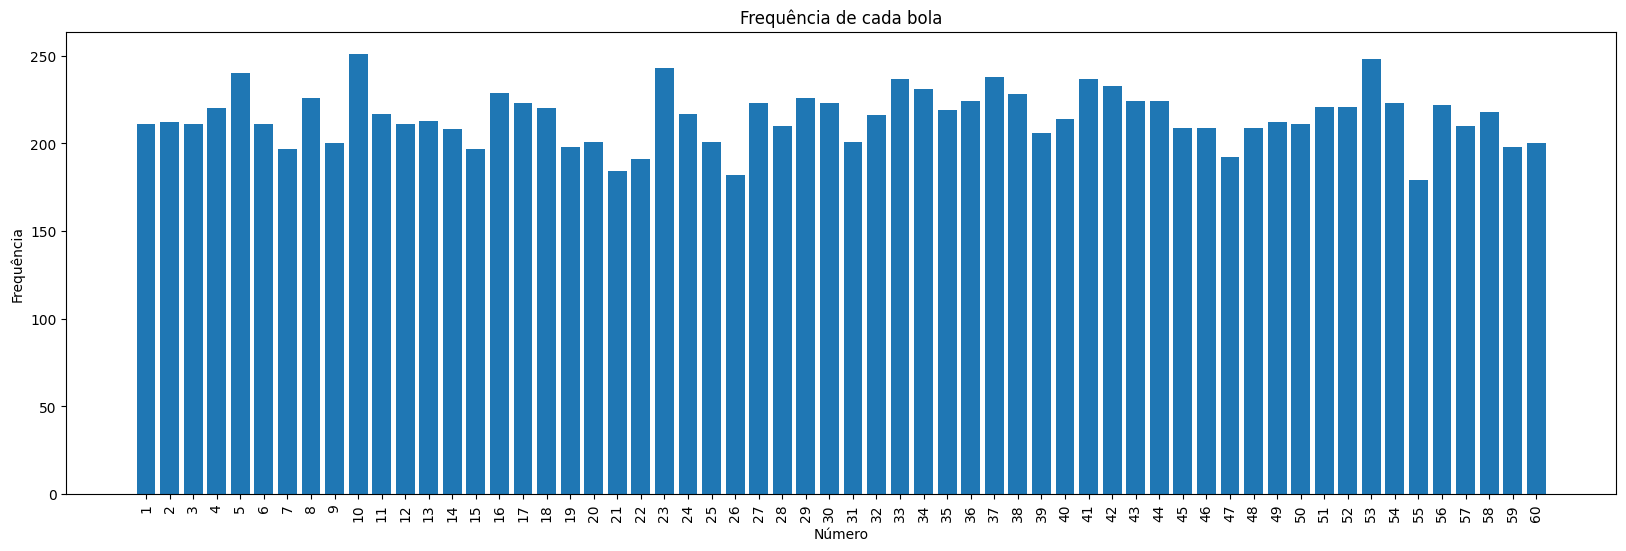

In [65]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(frequencia.index, frequencia.values)
ax.set(xlabel='Número', ylabel='Frequência', title='Frequência de cada bola')
ax.set_xticks(list(range(1, 61)))
ax.set_xticklabels([str(i) for i in range(1, 61)], rotation=90)

plt.show()

<Axes: title={'center': 'As seis dezenas mais sorteadas em todos os jogos'}, ylabel='numeros'>

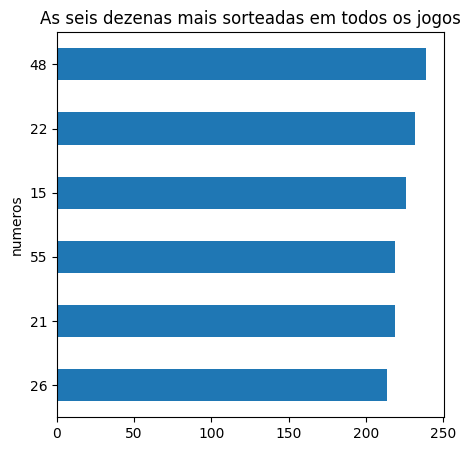

In [43]:
# As seis dezenas mais sorteadas em todos os jogos
dezenas = df.melt(value_vars=['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6'], var_name='bola', value_name='numeros')
dezenas['numeros'].value_counts().sort_values(ascending=True).head(6).plot(kind='barh', title='As seis dezenas mais sorteadas em todos os jogos',figsize=(5,5))

In [44]:
# Criando dataframe que vamos usar nos modelos
df_nn = df[['bola 1','bola 2','bola 3','bola 4','bola 5','bola 6', 'Concurso']]

# Deixando os nomes das coluna em minusculo
df_nn.columns = map(str.lower, df_nn.columns)

df_nn.head(5)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,concurso
0,34,10,21,19,14,17,2582
1,17,14,39,60,32,36,2581
2,43,36,3,29,13,4,2580
3,10,26,44,5,35,38,2579
4,47,59,60,37,50,39,2578


# Implementação rede neural

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [46]:
# Definição do seed para a reproducidade do modelo
np.random.seed(8)

In [47]:
# Separando target e classes
features = df_nn.iloc[:,0:6]
target = df_nn.iloc[:,6]

In [48]:
# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [49]:
# Criando modelo
modelo = Sequential()
modelo.add(Dense(64, input_dim=6, activation='relu'))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [50]:
# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Treinando modelo
modelo.fit(y_train, X_train, epochs=500, batch_size=32)

Epoch 1/500
55/55 [==============================] - 1s 2ms/step - loss: -1899382.5000 - accuracy: 5.7837e-04
Epoch 2/500
55/55 [==============================] - 0s 2ms/step - loss: -166144144.0000 - accuracy: 5.7837e-04
Epoch 3/500
55/55 [==============================] - 0s 3ms/step - loss: -3028448768.0000 - accuracy: 5.7837e-04
Epoch 4/500
55/55 [==============================] - 0s 2ms/step - loss: -22511523840.0000 - accuracy: 5.7837e-04
Epoch 5/500
55/55 [==============================] - 0s 2ms/step - loss: -101858861056.0000 - accuracy: 5.7837e-04
Epoch 6/500
55/55 [==============================] - 0s 2ms/step - loss: -333388283904.0000 - accuracy: 5.7837e-04
Epoch 7/500
55/55 [==============================] - 0s 2ms/step - loss: -874072113152.0000 - accuracy: 5.7837e-04
Epoch 8/500
55/55 [==============================] - 0s 2ms/step - loss: -1962574610432.0000 - accuracy: 5.7837e-04
Epoch 9/500
55/55 [==============================] - 0s 3ms/step - loss: -3917963067392.00

55/55 [==============================] - 0s 2ms/step - loss: -952437241592938496.0000 - accuracy: 5.7837e-04
Epoch 137/500
55/55 [==============================] - 0s 2ms/step - loss: -979759143470497792.0000 - accuracy: 5.7837e-04
Epoch 138/500
55/55 [==============================] - 0s 2ms/step - loss: -1007136364526829568.0000 - accuracy: 5.7837e-04
Epoch 139/500
55/55 [==============================] - 0s 2ms/step - loss: -1034919786410147840.0000 - accuracy: 5.7837e-04
Epoch 140/500
55/55 [==============================] - 0s 2ms/step - loss: -1063437132305006592.0000 - accuracy: 5.7837e-04
Epoch 141/500
55/55 [==============================] - 0s 2ms/step - loss: -1092984720595091456.0000 - accuracy: 5.7837e-04
Epoch 142/500
55/55 [==============================] - 0s 2ms/step - loss: -1122619720059584512.0000 - accuracy: 5.7837e-04
Epoch 143/500
55/55 [==============================] - 0s 3ms/step - loss: -1153208614580649984.0000 - accuracy: 5.7837e-04
Epoch 144/500
55/55 [===

55/55 [==============================] - 0s 2ms/step - loss: -13004080152357896192.0000 - accuracy: 5.7837e-04
Epoch 269/500
55/55 [==============================] - 0s 2ms/step - loss: -13196823441195401216.0000 - accuracy: 5.7837e-04
Epoch 270/500
55/55 [==============================] - 0s 2ms/step - loss: -13388477114009780224.0000 - accuracy: 5.7837e-04
Epoch 271/500
55/55 [==============================] - 0s 2ms/step - loss: -13584705854707335168.0000 - accuracy: 5.7837e-04
Epoch 272/500
55/55 [==============================] - 0s 2ms/step - loss: -13780389237637513216.0000 - accuracy: 5.7837e-04
Epoch 273/500
55/55 [==============================] - 0s 1ms/step - loss: -13978594900241809408.0000 - accuracy: 5.7837e-04
Epoch 274/500
55/55 [==============================] - 0s 2ms/step - loss: -14181320655147892736.0000 - accuracy: 5.7837e-04
Epoch 275/500
55/55 [==============================] - 0s 2ms/step - loss: -14384850153053880320.0000 - accuracy: 5.7837e-04
Epoch 276/500


55/55 [==============================] - 0s 2ms/step - loss: -62671529464534401024.0000 - accuracy: 5.7837e-04
Epoch 399/500
55/55 [==============================] - 0s 2ms/step - loss: -63312672286876631040.0000 - accuracy: 5.7837e-04
Epoch 400/500
55/55 [==============================] - 0s 3ms/step - loss: -63955719463358169088.0000 - accuracy: 5.7837e-04
Epoch 401/500
55/55 [==============================] - 0s 3ms/step - loss: -64614436879558770688.0000 - accuracy: 5.7837e-04
Epoch 402/500
55/55 [==============================] - 0s 3ms/step - loss: -65276070200596234240.0000 - accuracy: 5.7837e-04
Epoch 403/500
55/55 [==============================] - 0s 3ms/step - loss: -65942471004051734528.0000 - accuracy: 5.7837e-04
Epoch 404/500
55/55 [==============================] - 0s 3ms/step - loss: -66606791531507482624.0000 - accuracy: 5.7837e-04
Epoch 405/500
55/55 [==============================] - 0s 2ms/step - loss: -67281531031148036096.0000 - accuracy: 5.7837e-04
Epoch 406/500


In [52]:
numero_sorteio = [[20, 30, 48, 50, 52, 59]]
y_predict = pd.DataFrame(numero_sorteio)
y_predict

,0,1,2,3,4,5
0,20,30,48,50,52,59


In [53]:
# Fazendo a predição - Classes
predict_class = modelo.predict(y_predict)
print("1 = Tem chance de ganhar / 0 = Não tem chance de ganhar")
print("\n")
print("Previsão Modelo: ",predict_class[0][0])

1/1 [==============================] - 0s 63ms/step
1 = Tem chance de ganhar / 0 = Não tem chance de ganhar


Previsão Modelo:  1.0


In [54]:
# Achando a probabilidade - Proba
predict_proba = modelo.predict(y_predict)
print("Qual a probabilidade do número sair?")
print("\n")
print("Probabilidade: ", round((predict_proba[0][0]*100),2), "%")

1/1 [==============================] - 0s 30ms/step
Qual a probabilidade do número sair?


Probabilidade:  100.0 %


In [55]:
import random

random.seed(60)

probabilidade_boa = 99
probabilidade_atual = 0

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['bola 1','bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']].values.tolist()

# Gera sequencia de numeros até que a probabilidade seja maior ou igual que 99%
while(probabilidade_atual < probabilidade_boa):
    dezenas_megasena = random.sample(range(1, 60), 6)
    if not dezenas_megasena in dezenas_sorteadas:
        probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_megasena]))[0][0]*100)

print("Probabilidade de {0} % -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_megasena)))

1/1 [==============================] - 0s 31ms/step
Probabilidade de 100 % -> Dezenas: [10, 15, 17, 19, 20, 37]
